In [1]:
!pip install fastapi streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from fastapi import FastAPI
import streamlit as st
import joblib

In [3]:
# Function to load the dataset
def load_dataset(file_path):
    print('---------------------------------------------------------------------')
    df = pd.read_csv(file_path)
    print(df.head())
    return df

In [4]:
# Function to display dataset information
def display_dataset_info(df):
    print("Dataset Info:")
    print(df.info())
    print('---------------------------------------------------------------------')

# Function to display dataset summary statistics
def display_summary_statistics(df):
    print("Summary Statistics:")
    print(df.describe())
    print('---------------------------------------------------------------------')

# Function to display unique values count in each column
def display_unique_values_count(df):
    print("Unique Values Count:")
    print(df.nunique())
    print('---------------------------------------------------------------------')

In [5]:
# Function to perform exploratory data analysis and visualizations  #EDA
def exploratory_data_analysis(df):
    plt.figure(figsize=(10, 30))
    for i, col in enumerate(df.columns[1:-1], 1):
        plt.subplot(8, 1, i)
        sns.histplot(x=df[col], hue=df["fuelType"], multiple="dodge")
        plt.title(f"Distribution of {col} Data")
        plt.xticks(rotation=90)
        plt.tight_layout()
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["price"], hue = df[df["fuelType"] == "Petrol"]["fuelType"])
    plt.title("Mileage vs Price for Petrol Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["price"], hue = df[df["fuelType"] == "Diesel"]["fuelType"])
    plt.title("Mileage vs Price for Diesel Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["transmission"], hue = df[df["fuelType"] == "Petrol"]["fuelType"])
    plt.title("Mileage vs Transmission for Petrol Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["transmission"], hue = df[df["fuelType"] == "Diesel"]["fuelType"])
    plt.title("Mileage vs Transmission for Diesel Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["tax"], hue = df[df["fuelType"] == "Petrol"]["fuelType"])
    plt.title("Mileage vs Tax for Petrol Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["tax"], hue = df[df["fuelType"] == "Diesel"]["fuelType"])
    plt.title("Mileage vs Tax for Diesel Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["engineSize"], hue = df[df["fuelType"] == "Petrol"]["fuelType"])
    plt.title("Mileage vs Engine Size for Petrol Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["engineSize"], hue = df[df["fuelType"] == "Diesel"]["fuelType"])
    plt.title("Mileage vs Engine Size for Diesel Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["Manufacturer"], hue = df[df["fuelType"] == "Petrol"]["fuelType"])
    plt.title("Mileage vs Manufacturer for Petrol Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

    sns.scatterplot(x = df["mileage"], y = df["Manufacturer"], hue = df[df["fuelType"] == "Diesel"]["fuelType"])
    plt.title("Mileage vs Manufacturer for Diesel Vehicles")
    plt.show()
    print('---------------------------------------------------------------------')

In [6]:
def visualize_categorical_features(df):
    # Use LabelEncoder on object type of some features
    cat_cols = ["model", "transmission", "fuelType", "Manufacturer"]
    le = LabelEncoder()
    for label in cat_cols:
        df[label] = le.fit_transform(df[label])

    # Print the head of the DataFrame after encoding
    print(df.head())
    print('---------------------------------------------------------------------')

    # Compute correlation matrix
    df_corr = df.corr()

    # Sort the correlation of 'fuelType' in descending order
    sorted_corr = df_corr["fuelType"].sort_values(ascending=False)

    # Visualize correlation heatmap
    sns.heatmap(df_corr, fmt=".3f", cmap="YlGnBu")
    plt.show()
    print('---------------------------------------------------------------------')

    # Scatter plot for 'price' vs 'engineSize' for fuelType == 0 (Petrol)
    sns.scatterplot(x=df["price"], y=df["engineSize"], hue=df[df["fuelType"] == 0]["fuelType"])
    plt.show()
    print('---------------------------------------------------------------------')

    # Scatter plot for 'price' vs 'engineSize' for fuelType == 2 (Diesel)
    sns.scatterplot(x=df["price"], y=df["engineSize"], hue=df[df["fuelType"] == 2]["fuelType"])
    plt.show()
    print('---------------------------------------------------------------------')

    # Scatter plot for 'price' vs 'year' for fuelType == 0 (Petrol)
    sns.scatterplot(x=df["price"], y=df["year"], hue=df[df["fuelType"] == 0]["fuelType"])
    plt.show()
    print('---------------------------------------------------------------------')

    # Scatter plot for 'price' vs 'year' for fuelType == 2 (Diesel)
    sns.scatterplot(x=df["price"], y=df["year"], hue=df[df["fuelType"] == 2]["fuelType"])
    plt.show()
    print('---------------------------------------------------------------------')

    # Print the columns of the DataFrame except the last one
    print(df.columns[:-1])
    print('---------------------------------------------------------------------')

    return df

In [7]:
def remove_outliers(df):
    # Check outliers
    plt.figure(figsize=(10, 20))
    for i, col in enumerate(df.columns[:-1], 1):
        plt.subplot(3, 3, i)
        skewness = df[col].skew()
        sns.histplot(df[col], kde=True, label="Skew = %.3f" % (skewness))
        plt.title(f"Skewness of {col} Data")
        plt.legend(loc="best")
        plt.tight_layout()
        plt.plot()
        print('---------------------------------------------------------------------')

    for col in df.columns[:-1]:
        print(f"Column : {col}")
        plt.hist(df[col], density=True, bins=30)

        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, np.mean(df[col]), np.std(df[col]))
        plt.plot(x, p, 'k', linewidth=2)
        plt.show()
        print('---------------------------------------------------------------------')

        stat, p = shapiro(df[col])
        print("Statistics = %.3f, p = %.3f" % (stat, p))

        alpha = 0.05
        if p > alpha:
            print("Data looks Gaussian Distribution(fail to reject H0) \n")
        else:
            print("Data does not look Gaussian Distribution(reject H0) \n")

    # remove outliers
    for col in df.columns[:-1]:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

    # Check how many outliers are removed
    plt.figure(figsize=(10, 20))
    for i, col in enumerate(df.columns[:-1], 1):
        plt.subplot(3, 3, i)
        skewness = df[col].skew()
        sns.histplot(df[col], kde=True, label="Skew = %.3f" % (skewness), bins=30)
        plt.title(f"Skewness of {col} data outliers removed")
        plt.legend(loc="best")
        plt.tight_layout()
        plt.plot()
        print('---------------------------------------------------------------------')

    return df

In [8]:
# Function to split data into train and test sets
def split_data(df, test_size=0.2, random_state=0):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [9]:
def accuracy(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)

    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)

    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)

    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)

    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)

    return accuracy_score(y_test, y_reg), accuracy_score(y_test, y_svc), accuracy_score(y_test, y_rfc), accuracy_score(y_test, y_gbc), accuracy_score(y_test, y_abc), accuracy_score(y_test, y_knc)

In [10]:
def model_score(X_train, y_train, X_test, y_test):
    # Check train/test model score of RFC
    train_scores = []
    test_scores = []
    for i in range(1, 10):
        rfc = RandomForestClassifier(n_estimators = i, max_depth = i+1, min_samples_split = i+1)
        rfc.fit(X_train, y_train)

        train_scores.append(rfc.score(X_train, y_train))
        test_scores.append(rfc.score(X_test, y_test))
    sns.lineplot(train_scores, marker = '*', color = 'b')
    sns.lineplot(test_scores, marker = 'o', color = 'r')


In [11]:
#Load the dataset
file_path = "CarsData.csv"
df = load_dataset(file_path)

print('---------------------------------------------------------------------')

df1 = df.copy()
df.drop("fuelType", axis = 1, inplace = True)
df = pd.concat([df, df1["fuelType"]], axis = 1)

print('---------------------------------------------------------------------')

print(df.head())

print('---------------------------------------------------------------------')

---------------------------------------------------------------------
           model  year  price transmission  mileage fuelType  tax   mpg  \
0            I10  2017   7495       Manual    11630   Petrol  145  60.1   
1           Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2       2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3   Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4         Fiesta  2017   7999       Manual    19353   Petrol  125  54.3   

   engineSize Manufacturer  
0         1.0       hyundi  
1         1.0   volkswagen  
2         2.0          BMW  
3         2.0        skoda  
4         1.2         ford  
---------------------------------------------------------------------
---------------------------------------------------------------------
           model  year  price transmission  mileage  tax   mpg  engineSize  \
0            I10  2017   7495       Manual    11630  145  60.1         1.0   
1        

In [12]:
# Display dataset information
display_dataset_info(df)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   tax           97712 non-null  int64  
 6   mpg           97712 non-null  float64
 7   engineSize    97712 non-null  float64
 8   Manufacturer  97712 non-null  object 
 9   fuelType      97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB
None
---------------------------------------------------------------------


In [13]:
# Display summary statistics
display_summary_statistics(df)

Summary Statistics:
               year          price        mileage           tax           mpg  \
count  97712.000000   97712.000000   97712.000000  97712.000000  97712.000000   
mean    2017.066502   16773.487555   23219.475499    120.142408     55.205623   
std        2.118661    9868.552222   21060.882301     63.357250     16.181659   
min     1970.000000     450.000000       1.000000      0.000000      0.300000   
25%     2016.000000    9999.000000    7673.000000    125.000000     47.100000   
50%     2017.000000   14470.000000   17682.500000    145.000000     54.300000   
75%     2019.000000   20750.000000   32500.000000    145.000000     62.800000   
max     2024.000000  159999.000000  323000.000000    580.000000    470.800000   

         engineSize  
count  97712.000000  
mean       1.664913  
std        0.558574  
min        0.000000  
25%        1.200000  
50%        1.600000  
75%        2.000000  
max        6.600000  
----------------------------------------------------

In [14]:
# Display unique values count in each column
display_unique_values_count(df)

Unique Values Count:
model             196
year               27
price           13236
transmission        4
mileage         42214
tax                48
mpg               208
engineSize         40
Manufacturer        9
fuelType            5
dtype: int64
---------------------------------------------------------------------


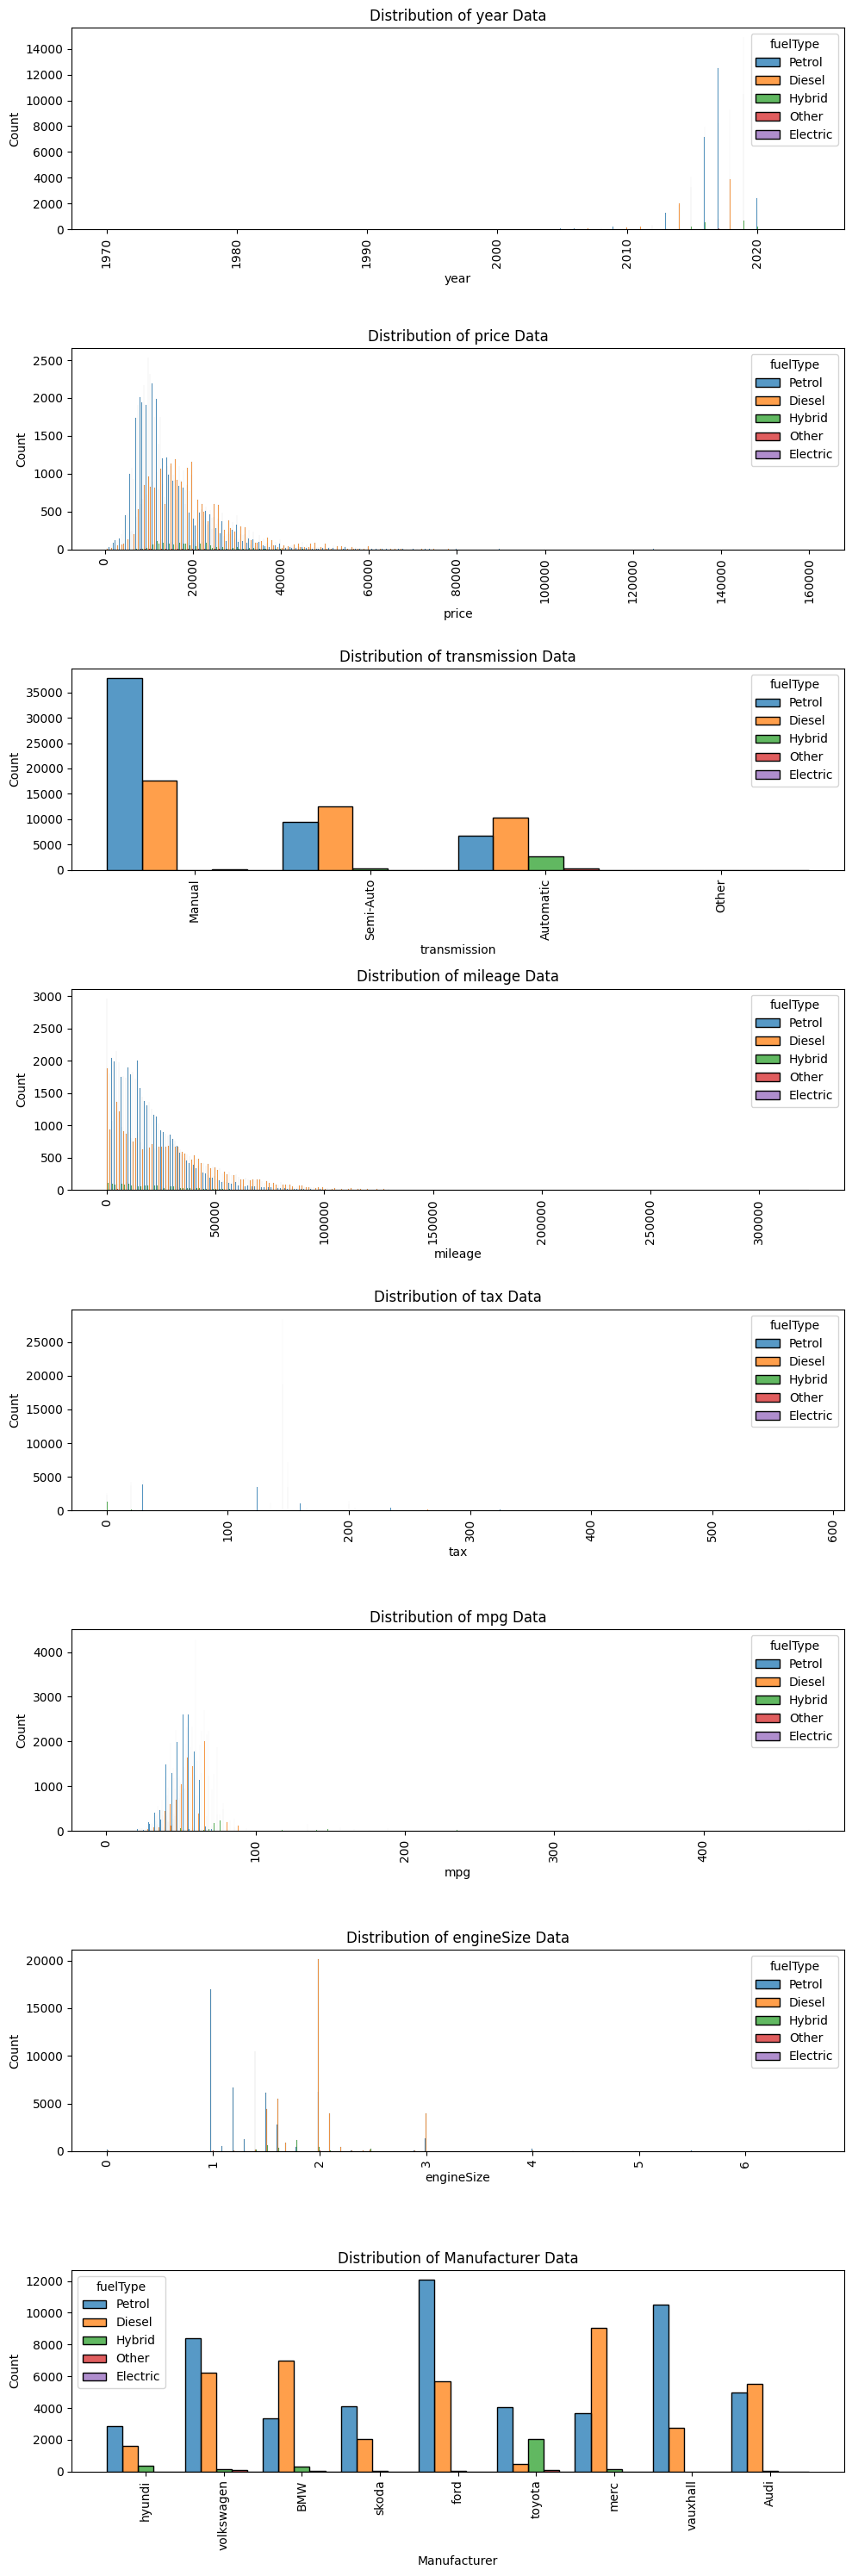

---------------------------------------------------------------------


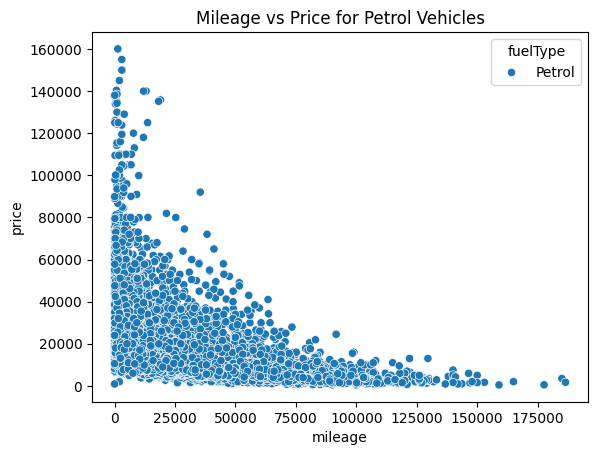

---------------------------------------------------------------------


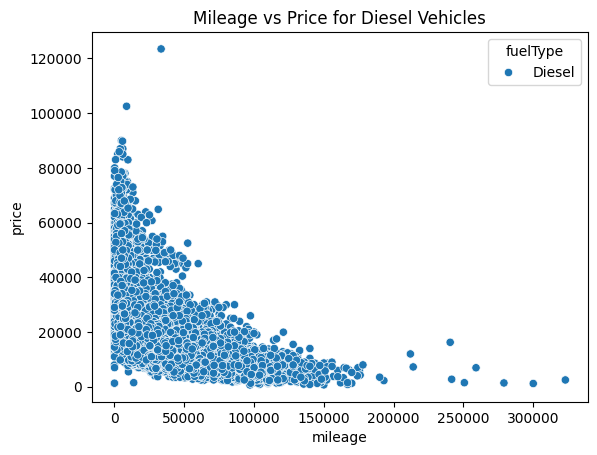

---------------------------------------------------------------------


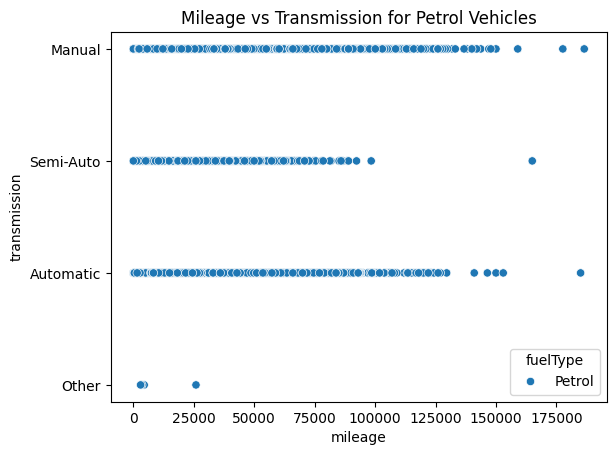

---------------------------------------------------------------------


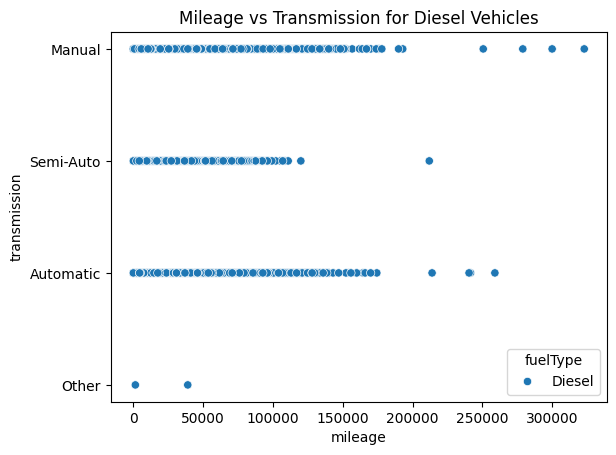

---------------------------------------------------------------------


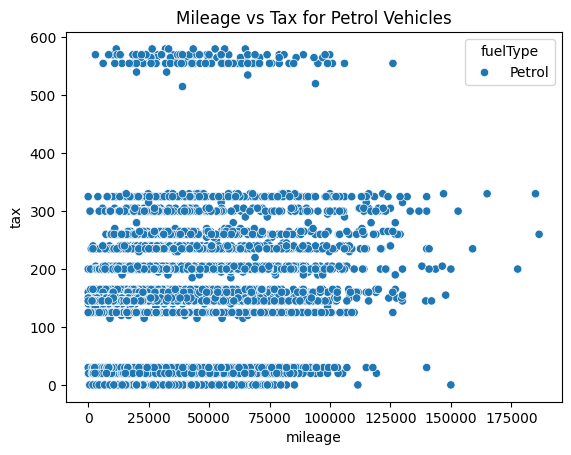

---------------------------------------------------------------------


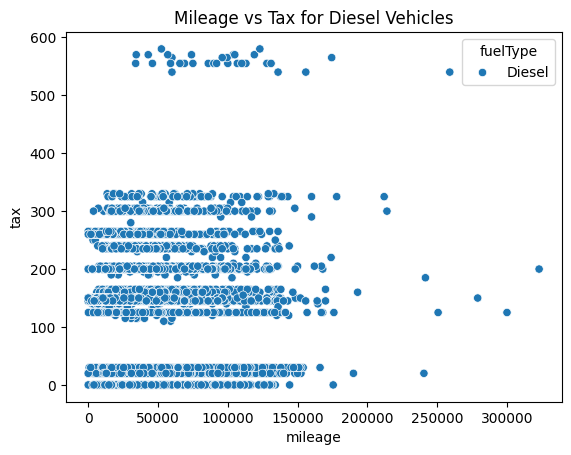

---------------------------------------------------------------------


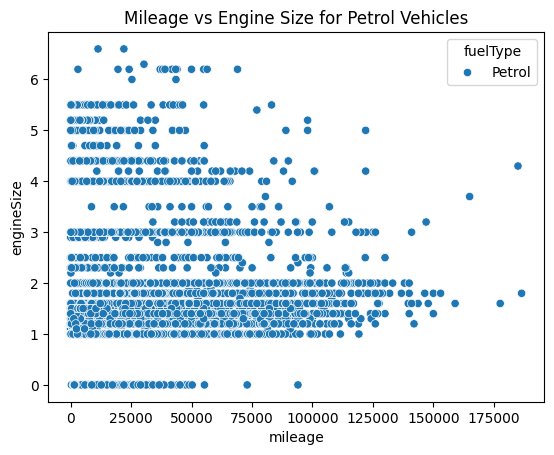

---------------------------------------------------------------------


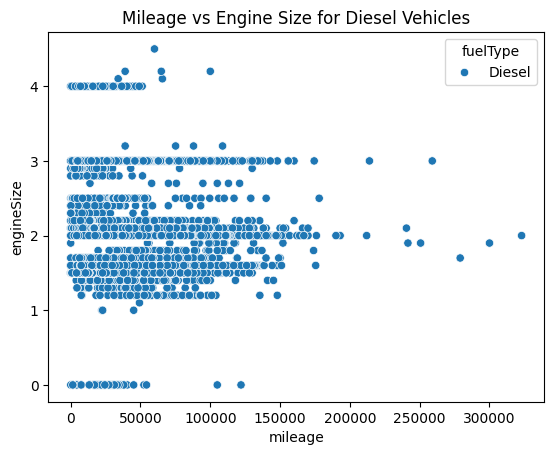

---------------------------------------------------------------------


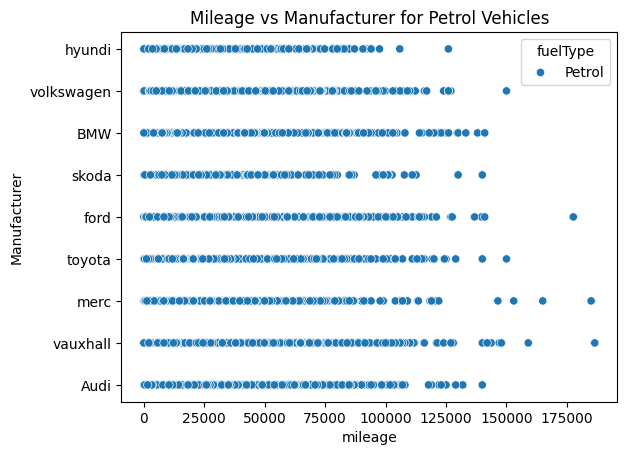

---------------------------------------------------------------------


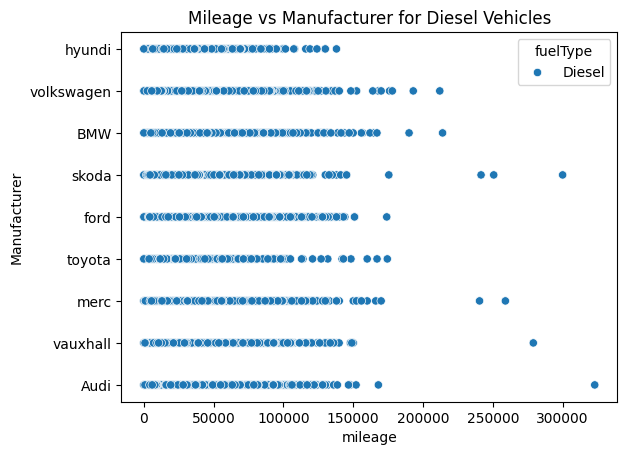

---------------------------------------------------------------------


In [15]:
# Perform exploratory data analysis and visualizations
exploratory_data_analysis(df)

   model  year  price  transmission  mileage  tax   mpg  engineSize  \
0     81  2017   7495             1    11630  145  60.1         1.0   
1    115  2017  10989             1     9200  145  58.9         1.0   
2      1  2019  27990             3     1614  145  49.6         2.0   
3    184  2017  12495             1    30960  150  62.8         2.0   
4     60  2017   7999             1    19353  125  54.3         1.2   

   Manufacturer  fuelType  
0             3         4  
1             8         4  
2             1         0  
3             5         0  
4             2         4  
---------------------------------------------------------------------


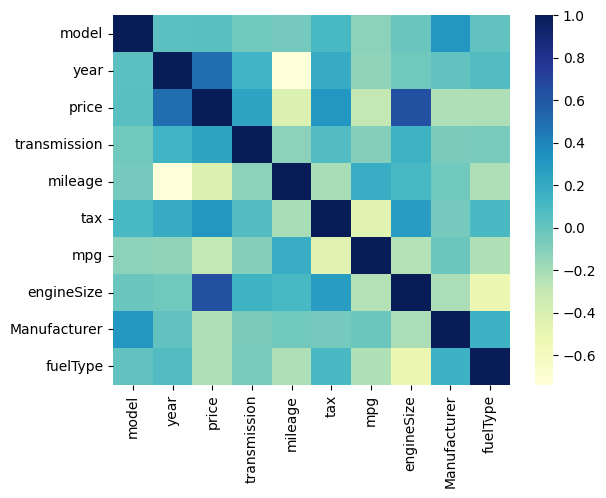

---------------------------------------------------------------------


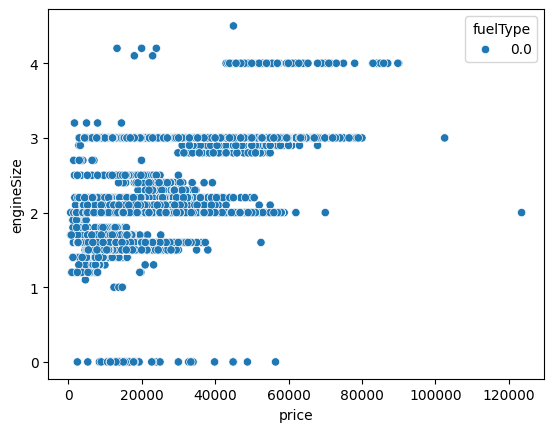

---------------------------------------------------------------------


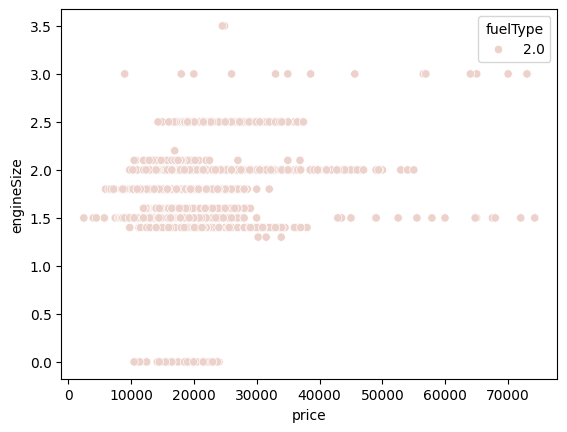

---------------------------------------------------------------------


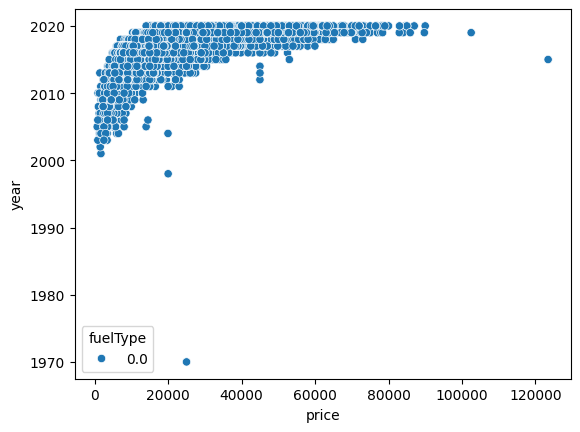

---------------------------------------------------------------------


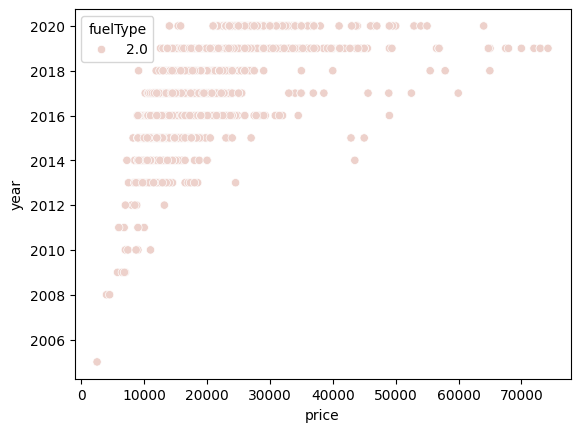

---------------------------------------------------------------------
Index(['model', 'year', 'price', 'transmission', 'mileage', 'tax', 'mpg',
       'engineSize', 'Manufacturer'],
      dtype='object')
---------------------------------------------------------------------


In [16]:
# Visualize categorical features and perform Label Encoding
df = visualize_categorical_features(df)

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
Column : model


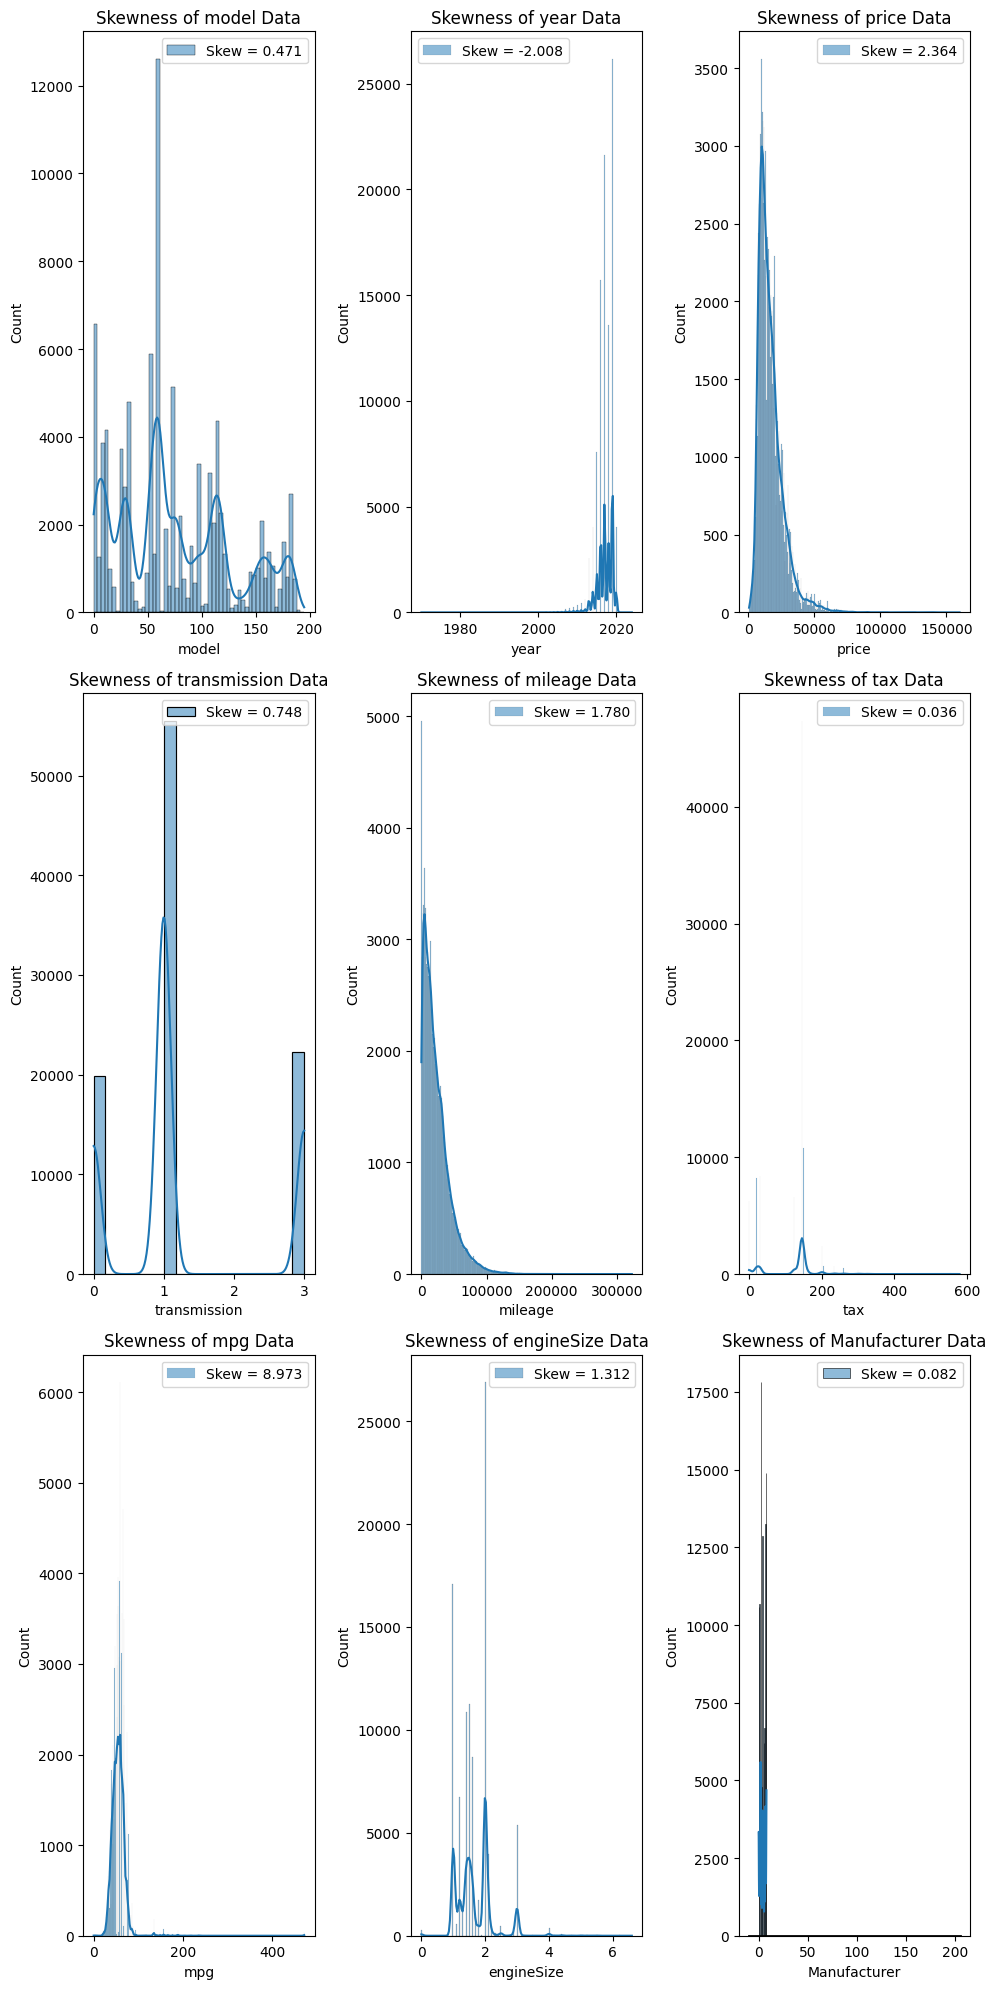

---------------------------------------------------------------------
Statistics = 0.942, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : year


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


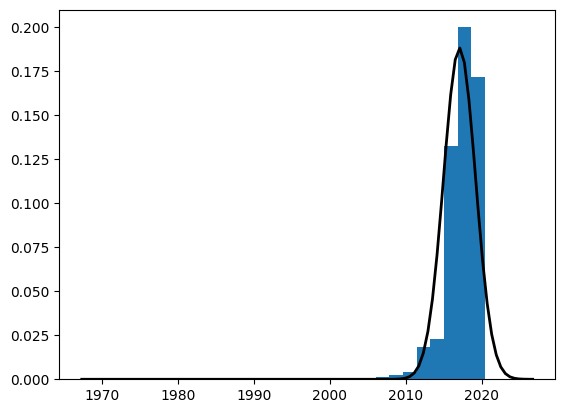

---------------------------------------------------------------------
Statistics = 0.851, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : price


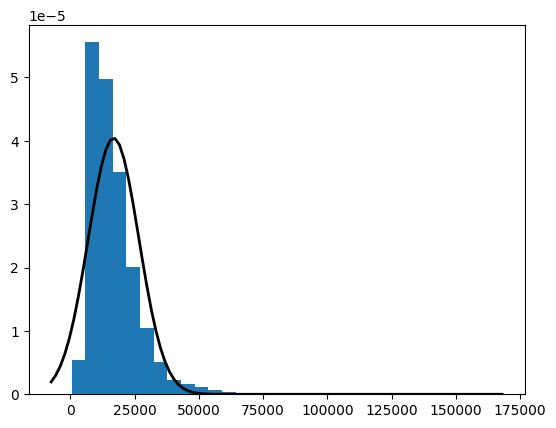

---------------------------------------------------------------------
Statistics = 0.835, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : transmission


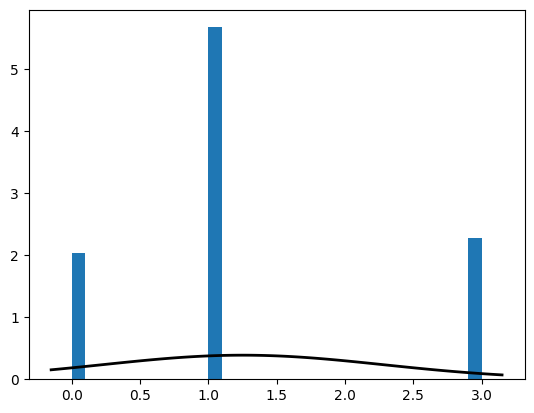

---------------------------------------------------------------------
Statistics = 0.749, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : mileage


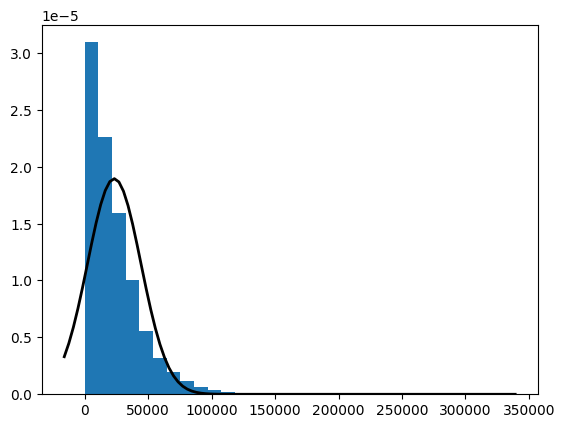

---------------------------------------------------------------------
Statistics = 0.855, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : tax


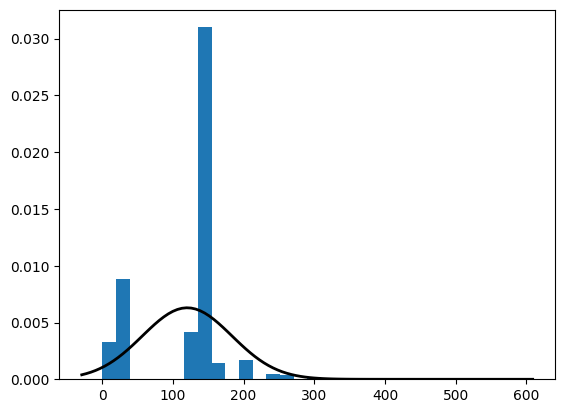

---------------------------------------------------------------------
Statistics = 0.742, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : mpg


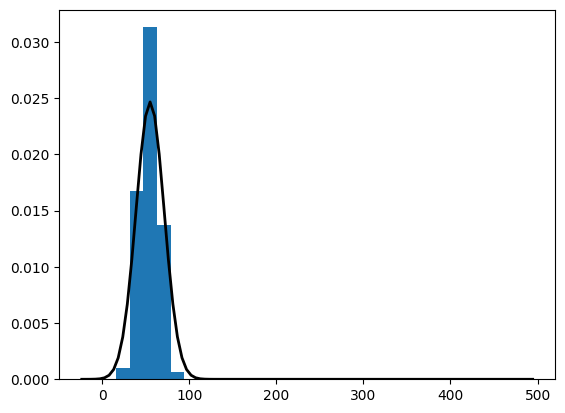

---------------------------------------------------------------------
Statistics = 0.666, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : engineSize


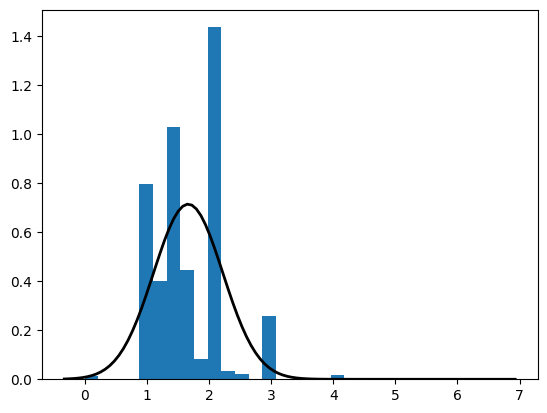

---------------------------------------------------------------------
Statistics = 0.872, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : Manufacturer


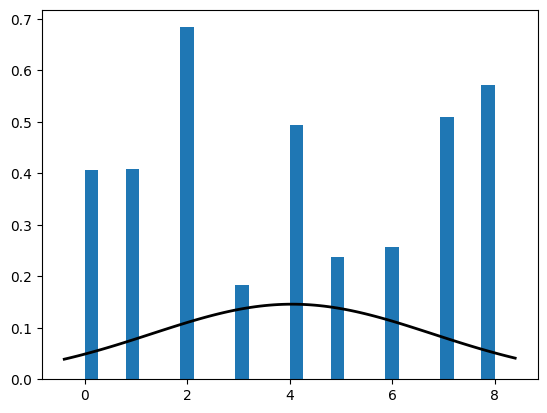

---------------------------------------------------------------------
Statistics = 0.905, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------


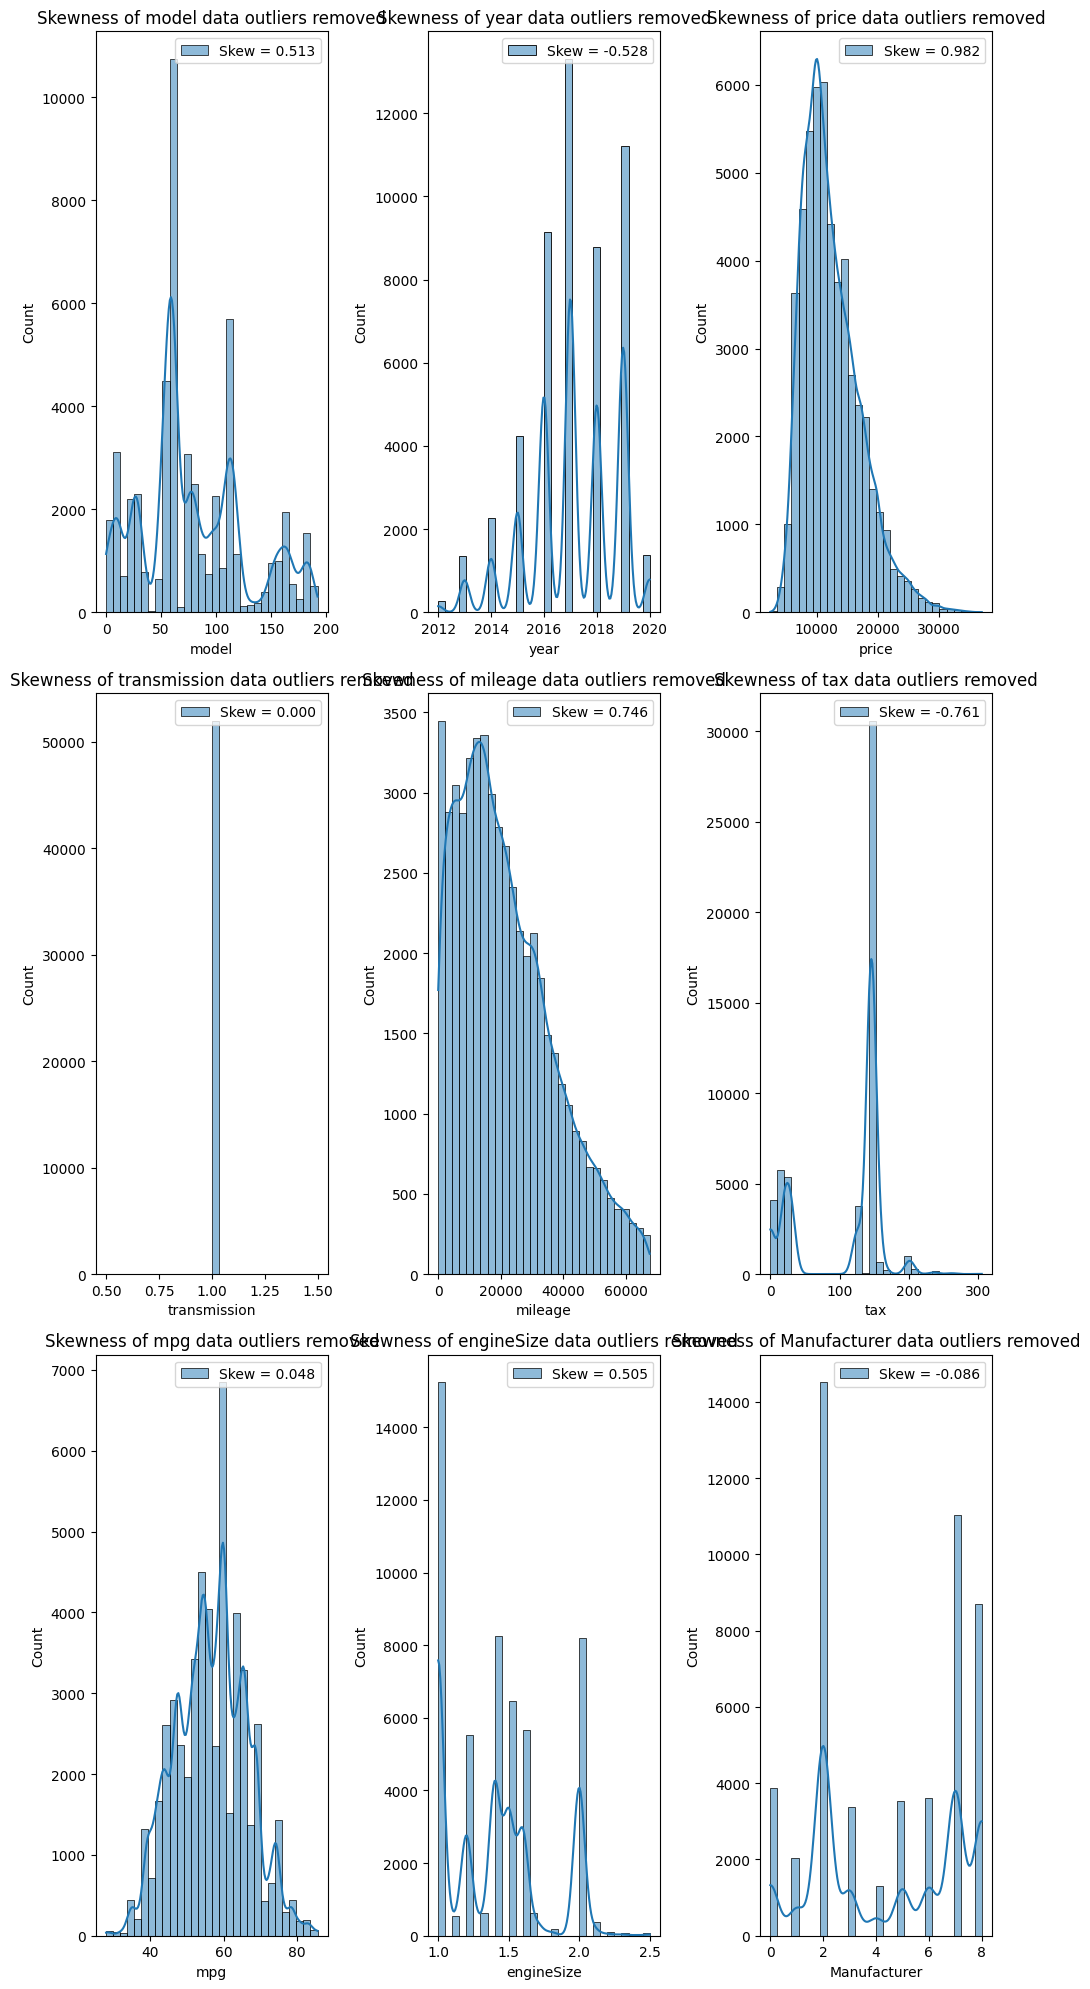

In [17]:
# Remove outliers
df = remove_outliers(df)

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = split_data(df)

In [19]:
scores = pd.DataFrame(columns = ["REG", "SVC", "RFC", "GBC", "ABC", "KNC"],index = ["ACC"])
acc = [reg, svc, rfc, gbc, abc, knc] = accuracy(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
scores.iloc[0, :] = acc
print(scores)

          REG       SVC       RFC       GBC       ABC       KNC
ACC  0.961624  0.989997  0.997211  0.995287  0.817736  0.995191


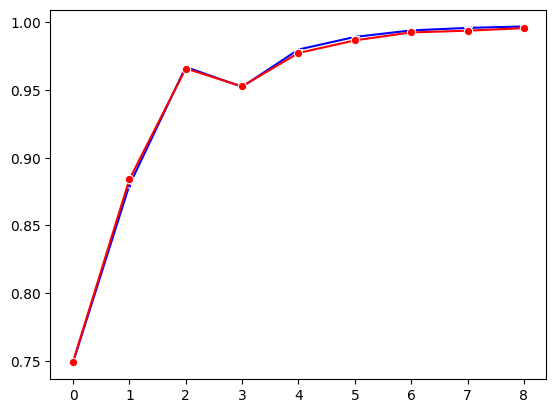

In [21]:
# Check train/test model score of RFC
model_score(X_train, y_train, X_test, y_test)

In [22]:
# Train/Test Model Score of RFC
rfc = RandomForestClassifier(n_estimators = 2, max_depth = 3, min_samples_split = 3)
rfc.fit(X_train, y_train)
print("RFC Train Model Score :", rfc.score(X_train, y_train))
print('---------------------------------------------------------------------')
print("RFC Test Model Score :", rfc.score(X_test, y_test))

RFC Train Model Score : 0.9360136581143146
---------------------------------------------------------------------
RFC Test Model Score : 0.9369048764066558


In [23]:
joblib.dump(rfc, "random_forest_model")

['random_forest_model']